In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
# Create dataset
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 5, 7, 11]
}
df = pd.DataFrame(data)

# Extract X and Y values
X = df[['X']]  # Feature matrix
Y = df['Y']    # Target vector

In [ ]:
# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)


In [ ]:
# Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [ ]:
# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_[0]}')


In [ ]:
# Calculate correlation
correlation = df['X'].corr(df['Y'])
print(f'Correlation coefficient: {correlation}')

In [ ]:
# Calculate correlation and p-value using scipy
correlation, p_value = pearsonr(df['X'], df['Y'])
print(f'Correlation coefficient: {correlation}')
print(f'p-value: {p_value}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Create dataset
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 5, 7, 11]
}
df = pd.DataFrame(data)

# Extract X and Y values
X = df[['X']]  # Feature matrix
Y = df['Y']    # Target vector

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_[0]}')

# Calculate correlation
correlation = df['X'].corr(df['Y'])
print(f'Correlation coefficient: {correlation}')

# Calculate correlation and p-value using scipy
correlation, p_value = pearsonr(df['X'], df['Y'])
print(f'Correlation coefficient: {correlation}')
print(f'p-value: {p_value}')


File: Chanae-regression.xlsx
Mean Squared Error: 13793017.18703368
R^2 Score: -0.7098999679976981


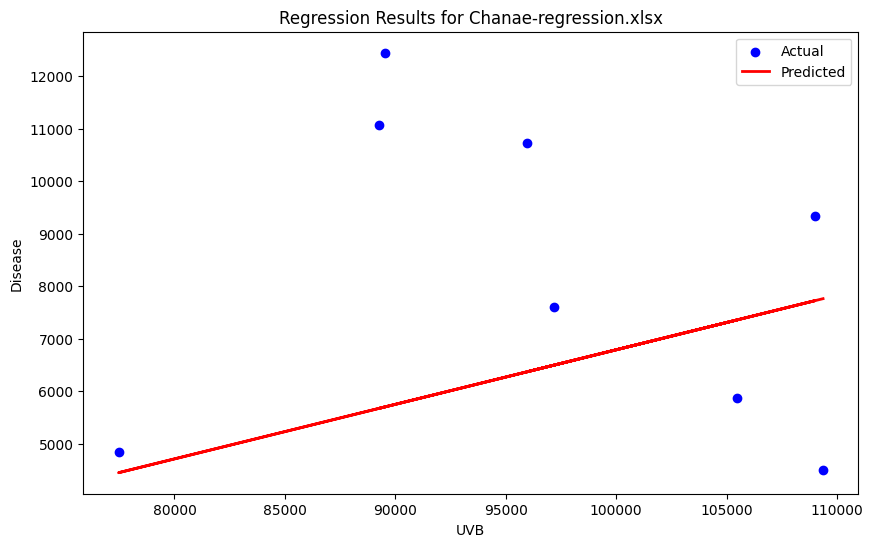

File: Chang-Phueak-regression.xlsx
Mean Squared Error: 15758818.802522779
R^2 Score: -0.9535974907249585


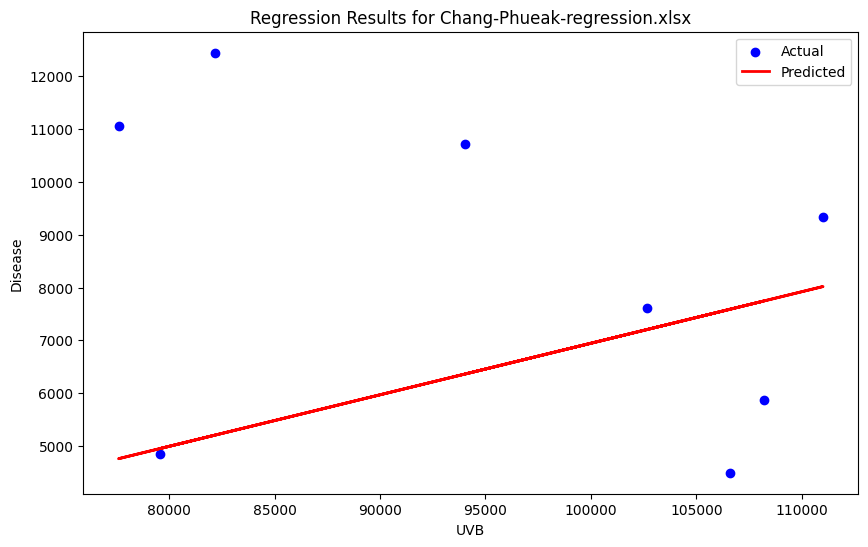

File: Du-Song-Yo-regression.xlsx
Mean Squared Error: 14143240.901493771
R^2 Score: -0.7533166845889236


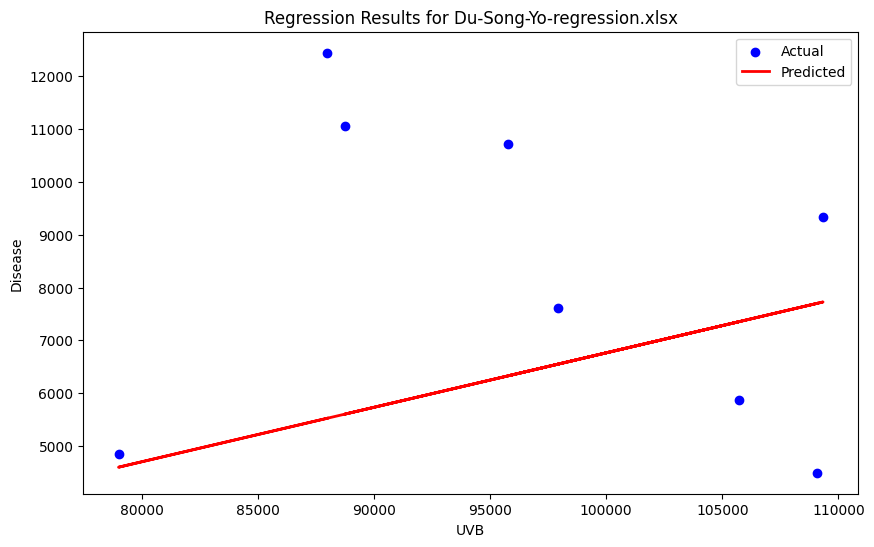

File: Phadung-Mat-regression.xlsx
Mean Squared Error: 13222658.437597513
R^2 Score: -0.6391934362661991


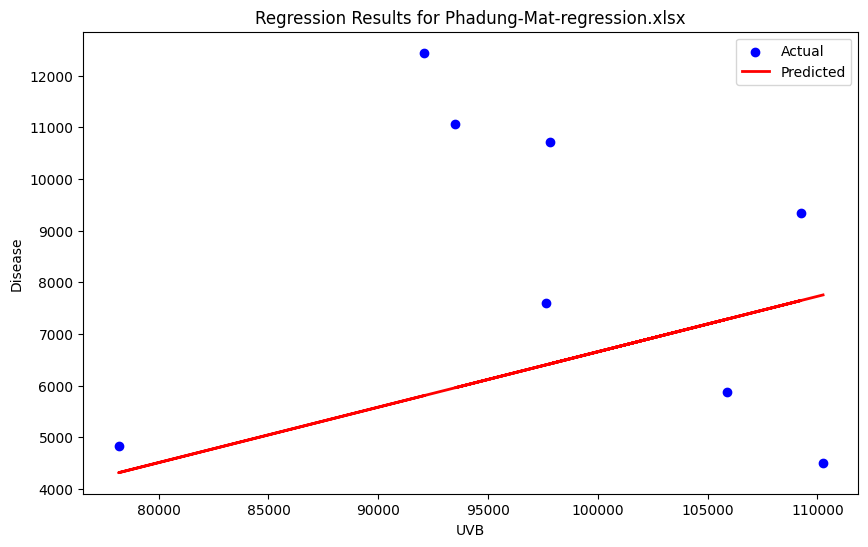

In [18]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directory settings
target = '../Chanae-regression/season'
# sunny rainy winter
output_dir = '../Chanae-regression/2021/sunny'
# 'uvb','d2m','RH','minTemp','maxTemp','meanTemp','tp','WS'
data_plot = 'uvb'
plots_dir = os.path.join(output_dir, 'plots'+f'/{data_plot}')
os.makedirs(output_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

# Date settings
start_date = '2021-03-22'
start_date = pd.to_datetime(start_date)
end_date = start_date + pd.Timedelta(days=35)

evaluation_results = []

for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
    
    # Filter data within the specified date range
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)].copy()


    # 'uvb','d2m','RH','minTemp','maxTemp','meanTemp','tp','WS'
    # Prepare data for regression
    X = filtered_data[[data_plot]]
    y = filtered_data['disease']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform linear regression on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics on the test set
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the evaluation results
    evaluation_results.append({
        'File': file,
        'Mean Squared Error': mse,
        'R^2 Score': r2,
    })
    
    print(f"File: {file}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel('UVB')
    plt.ylabel('Disease')
    plt.title(f'Regression Results for {file}')
    plt.legend()
    # plt.show()

    plot_path = os.path.join(plots_dir, f'{file}_regression_plot.png')
    plt.savefig(plot_path)
    plt.show()
    

# Save the evaluation results to an Excel file

evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df_path = os.path.join(plots_dir,'evaluation-results.xlsx')
evaluation_df.to_excel(evaluation_df_path, index=False, engine='openpyxl')
